In [68]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, Dense, GlobalMaxPooling1D,Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [69]:
#importing the dataset
content = open('dataset_plans001.json' , encoding='utf-8')
data1 = json.load(content)

In [70]:
#getting all the data to lists
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [71]:
#converting to dataframe
data = pd.DataFrame({"input":inputs,"tag":tags})

In [72]:
#printing the data
data

,input,tag
0,11,1
1,12,2
2,21,3
3,22,4
4,31,5
5,32,6


In [73]:
#removing punctuations
import string
data['input'] = data['input'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['input'] = data['input'].apply(lambda wrd: ''.join(wrd))
data

,input,tag
0,11,1
1,12,2
2,21,3
3,22,4
4,31,5
5,32,6


In [74]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['input'])
train = tokenizer.texts_to_sequences(data['input'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tag'])

In [75]:
input_shape = x_train.shape[1]
print(input_shape)

1


In [76]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  6
output length:  6


In [77]:
def get_model():
    #creating the model
    i = Input(shape=(input_shape,))
    x = Embedding(vocabulary+1,10)(i)
    x = LSTM(10,return_sequences=True)(x)
    x = Flatten()(x)
    x = Dense(output_length,activation="softmax")(x)
    model = Model(i,x)
    return model

In [78]:
model = get_model()

In [79]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [80]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.7885 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 1.7880 - accuracy: 0.3333
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 1.7875 - accuracy: 0.3333
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 1.7870 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 1.7864 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 1.7859 - accuracy: 0.6667
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 1.7854 - accuracy: 0.6667
Epoch 8/200
1/1 [==============================] - 0s 19ms/step - loss: 1.7848 - accuracy: 0.6667
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 1.7843 - accuracy: 0.6667
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 1.7838 - accuracy: 0.6667
Epoch 11/200
1/1 [===========

1/1 [==============================] - 0s 8ms/step - loss: 1.6875 - accuracy: 0.8333
Epoch 85/200
1/1 [==============================] - 0s 5ms/step - loss: 1.6848 - accuracy: 0.8333
Epoch 86/200
1/1 [==============================] - 0s 7ms/step - loss: 1.6820 - accuracy: 0.8333
Epoch 87/200
1/1 [==============================] - 0s 5ms/step - loss: 1.6792 - accuracy: 0.8333
Epoch 88/200
1/1 [==============================] - 0s 6ms/step - loss: 1.6763 - accuracy: 0.8333
Epoch 89/200
1/1 [==============================] - 0s 5ms/step - loss: 1.6734 - accuracy: 0.8333
Epoch 90/200
1/1 [==============================] - 0s 5ms/step - loss: 1.6704 - accuracy: 0.8333
Epoch 91/200
1/1 [==============================] - 0s 5ms/step - loss: 1.6673 - accuracy: 0.8333
Epoch 92/200
1/1 [==============================] - 0s 5ms/step - loss: 1.6642 - accuracy: 0.8333
Epoch 93/200
1/1 [==============================] - 0s 8ms/step - loss: 1.6610 - accuracy: 0.8333
Epoch 94/200
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 1.2715 - accuracy: 0.8333
Epoch 167/200
1/1 [==============================] - 0s 6ms/step - loss: 1.2646 - accuracy: 0.8333
Epoch 168/200
1/1 [==============================] - 0s 5ms/step - loss: 1.2576 - accuracy: 0.8333
Epoch 169/200
1/1 [==============================] - 0s 9ms/step - loss: 1.2507 - accuracy: 0.8333
Epoch 170/200
1/1 [==============================] - 0s 5ms/step - loss: 1.2437 - accuracy: 0.8333
Epoch 171/200
1/1 [==============================] - 0s 8ms/step - loss: 1.2367 - accuracy: 0.8333
Epoch 172/200
1/1 [==============================] - 0s 10ms/step - loss: 1.2297 - accuracy: 0.8333
Epoch 173/200
1/1 [==============================] - 0s 6ms/step - loss: 1.2227 - accuracy: 1.0000
Epoch 174/200
1/1 [==============================] - 0s 4ms/step - loss: 1.2157 - accuracy: 1.0000
Epoch 175/200
1/1 [==============================] - 0s 10ms/step - loss: 1.2087 - accuracy: 1.0000
Epoch 176/200
1/1 [===

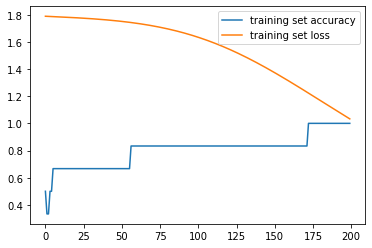

In [81]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [82]:
#Saving model
import os.path
if os.path.isfile("Predictplan001") is False:
    model.save("Predictplan001.h5")

In [83]:
# Testing Model
# chatting
import random
from tensorflow import keras


#Loading model
reconstructed_model = keras.models.load_model("Predictplan001.h5")


while True:
    texts_p = []
    prediction_input = input('You : ')

    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    
    #getting output from model
    output = reconstructed_model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Output :",random.choice(responses[response_tag]))
    

SyntaxError: invalid syntax (4224623672.py, line 14)